                                                  UNIVERSIDADE FEDERAL DE MINAS GERAIS
                                                  Departamento de Ciência da Computação

<h1><b>ICD - PROJETO FINAL : MÉTRICAS SOCIOPOLÍTICAS E VACINAÇÃO(COVID-19)</b></h1>

## Participantes:
Emyle Santos Lima - 2020006493<br>
Jorge Luiz de Lacerda Quetz - 2019006833 <br>
João Pedro Fernandes - 2019006760<br>
Lucas Emanuel Elias Alves - 2019006914 <br>



## **Links**

Video: <br>
GitHub:https://github.com/JoaoP-Silva/Covid-analysis

# **Introdução**

O trabalho a seguir trata do tópico de entender entender como as condições de vida de um país e sua conjuntura política se relacionam com o índice de vacinação contra a Covid-19.

# **Perguntas**

1. A taxa de vacinação ao redor do mundo é desigual?<br>
2. Países com IDH alto tendem a ter uma taxa de vacinação maior comparada aos países com IDH baixo?<br>
3. Países de regimes ditatoriais tendem a ter uma taxa de vacinação menor comparada aos países de regimes democráticos?<br>
4. É possível prever a taxa de vacinação de um país a partir do seu IDH?<br>
5. É possível prever a taxa de vacinação de um país a partir do seu índice de Gini?<br>

# **Datasets** **utilizados**

- *COVID-19 World Vaccination Progress:* Descreve a progressão da taxa de vacinação ao redor do mundo separado por país.

- *Democracy-Dictatorship_By_Country:* Lista de países e seu regime governamental(ditadura ou democracia).

- *Human Development Index Historical data:* IDH por país e data.

- *World Income Inequality Database:* Índice de GINI por país e data.

**Fontes:** 

- https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress

- https://www.kaggle.com/datasets/cesalexguz/democracydictatorship-by-country

- https://www.kaggle.com/datasets/elmartini/human-development-index-historical-data

- https://www.kaggle.com/datasets/mannmann2/world-income-inequality-database

# **1. Importação de bibliotecas e manipulação inicial dos dados**

In [ ]:
!pip install geopandas mapclassify

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd

In [ ]:
df_IDH = pd.read_csv('https://raw.githubusercontent.com/JoaoP-Silva/Covid-analysis/main/HDI.csv')
df_VACCINATION = pd.read_csv('https://raw.githubusercontent.com/JoaoP-Silva/Covid-analysis/main/country_vaccinations.csv')
df_DEMOCRACY = pd.read_csv('https://raw.githubusercontent.com/JoaoP-Silva/Covid-analysis/main/democracy_dictatorship_by_country.csv', sep = ';')
df_GINI = pd.read_csv('https://raw.githubusercontent.com/JoaoP-Silva/Covid-analysis/main/gini.csv')

In [ ]:
df_IDH.head()

In [ ]:
df_VACCINATION.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86511,Zimbabwe,ZWE,2022-03-29,9039729.0,5053114.0,3510256.0,105369.0,103751.0,59.90,33.48,23.26,6874.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


Abaixo agrupam-se os dados de vacinação por país e mantem-se a informação mais recente relacionada à taxa de vacinação.

In [ ]:
filter = df_VACCINATION.groupby(['country'])['date'].max().reset_index()
keys = list(filter.columns.values)
i1 = df_VACCINATION.set_index(keys).index
i2 = filter.set_index(keys).index
df_VACCINATION = df_VACCINATION[i1.isin(i2)]
df_VACCINATION = df_VACCINATION.reset_index()

# **2. Análise Exploratória dos Dados**

Visando apresentar dados que pudessem ser facilmente percebidos e entendidos, decidiu-se, nesta etapa, por gerar uma visualização de mapa onde poderíamos plotar a porcentagem de pessoas vacinadas em uma grande quantidade de países, em um modelos de mapa mundi. Para tal feito, foi-se necessária a importação da biblioteca Geopandas, que permite a manipulação de dados para exibição em mapa.

# Código

World é então declarado como sendo a representação do mapa mundi, feito através de um dataset padrão da biblioteca Geopandas, que traz algumas informações padrões sobre os países representados e o seu formato poligonal, que é usado para o plot do mapa. Logo ao iniciar a manipulação dos dados, pode-se perceber que alguns países não tiveram suas siglas ISO devidamente representadas no dataset original. Notou-se que aqueles que não tinham as siglas ISO eram representados por "-99". Sendo assim, fez-se primeiramente a exibição de quais seriam essas linhas e então foi realizada a troca do valor da célula do dataframe pelo ISO respectivo.

In [ ]:
df1 = df_VACCINATION
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)
print(world.loc[world['iso_a3']=="-99"])

      pop_est continent        name iso_a3  gdp_md_est  \
21    5320045    Europe      Norway    -99    364700.0   
43   67106161    Europe      France    -99   2699000.0   
160    265100      Asia   N. Cyprus    -99      3600.0   
167   3500000    Africa  Somaliland    -99     12250.0   
174   1895250    Europe      Kosovo    -99     18490.0   

                                              geometry  
21   MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...  
43   MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...  
160  POLYGON ((32.73178 35.14003, 32.80247 35.14550...  
167  POLYGON ((48.94820 11.41062, 48.94820 11.41062...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  


Note que aqui foi realizada a troca somente das linhas referentes à França e Noruega no dataframe World. Isso se deu pois, logo mais a frente, notou-se que o mapa gerado pela biblioteca Geopandas não abarcava aqueles outros países, motivo pelo qual não se fazia necessário a troca.

In [ ]:
world.at[21, 'iso_a3'] = "NOR"
world.at[43, 'iso_a3'] = "FRA"

Foi feito então um merge com os dados que foram obtidos no dataframe de vacinação da covid no mundo com o dataframe world, para realizar o plot do mapa. Restringiu-se as colunas apenas àquelas que seriam necessárias para a nossa análise.

In [ ]:
data1 = world.merge(df1, left_on=['iso_a3'], right_on=['iso_code'])
data1 = data1[data1['people_vaccinated_per_hundred'].notna()]
data1 = data1[['name', 'iso_a3', 'people_vaccinated_per_hundred']]

In [ ]:
result = pd.merge(world, data1, on=['iso_a3', 'name'], how='left')


Com o uso então do método plot da biblioteca geopandas, fez-se a exibição do mapa:


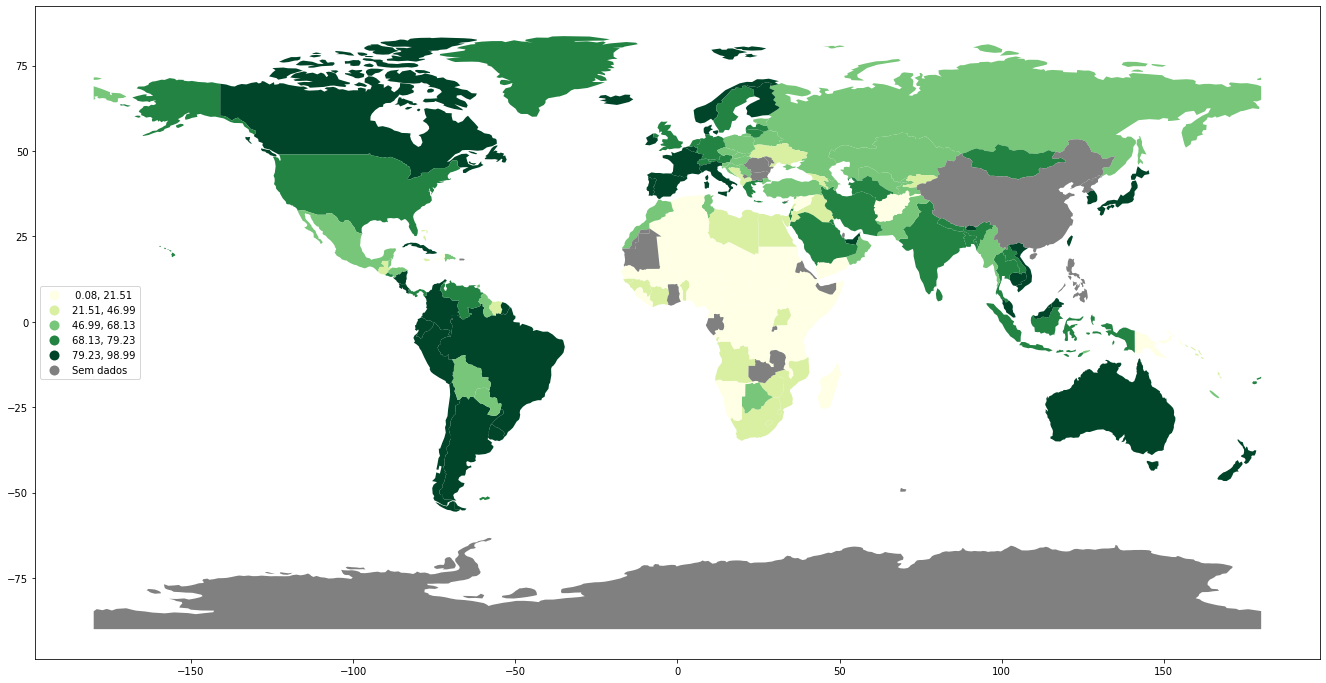

In [ ]:
world['people_vaccinated_per_hundred'] = result['people_vaccinated_per_hundred']

world.plot(column='people_vaccinated_per_hundred',
            cmap='YlGn', 
            figsize=(25, 12),
            scheme = "quantiles",
            legend = True,
            missing_kwds={'color': 'grey',
                          'label': "Sem dados"},
            legend_kwds=dict(loc='center left')
            )


# Gráfico

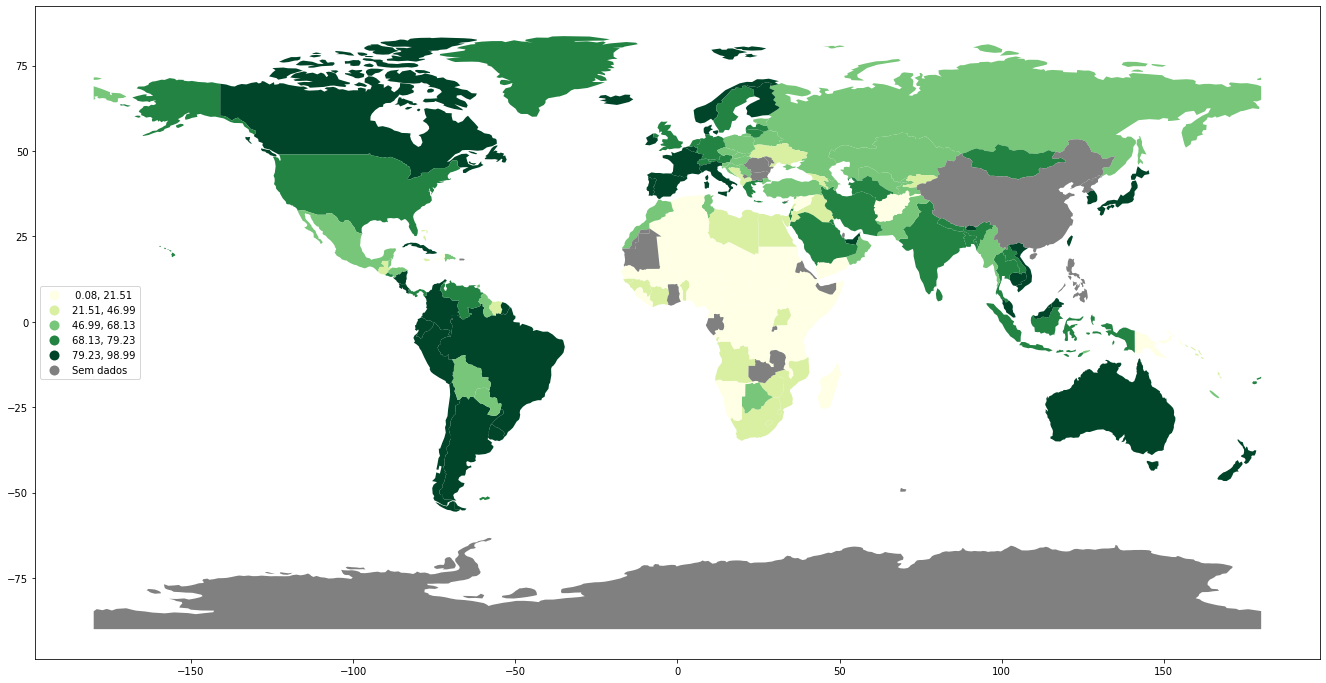

A partir do mapa acima, podemos responder à **pergunta 1**. A taxa de vacinação ao redor do mundo é desigual e podemos notar alguns padrões que serão explorados nas análises subsequentes:

*   O continente africano é o que apresentou as piores taxas de vacinação de todo o planeta
*   No geral, países conhecidamente bem desenvolvidos apresentaram ótimas taxas de vacinação da população
*   A América do sul apresentou ótimos resultados, sendo que 7 dos seus 12 países tiveram taxas de vacinação entre 79,23% e 98,99%.

#**3. Gerando dataframe Vacinação e IDH**

Vamos juntar os dados da vacinação com os dados sobre o índice de Desenvolvimento Humano (IDH)

In [ ]:
df_IDH = df_IDH[['HDI Rank', 'Country', '2019' ]]
df_IDH

,HDI Rank,Country,2019
0,169,Afghanistan,0.511
1,69,Albania,0.795
2,91,Algeria,0.748
3,36,Andorra,0.868
4,148,Angola,0.581
...,...,...,...
184,113,Venezuela (Bolivarian Republic of),0.711
185,117,Viet Nam,0.704
186,179,Yemen,0.470
187,146,Zambia,0.584


In [ ]:
temp = df_VACCINATION.merge(df_IDH, 
             how = "inner",
             left_on = "country", right_on = "Country")
temp = temp[['country', 'people_fully_vaccinated_per_hundred', '2019']]
temp

,country,people_fully_vaccinated_per_hundred,2019
0,Afghanistan,11.10,0.511
1,Albania,42.30,0.795
2,Algeria,13.70,0.748
3,Andorra,68.99,0.868
4,Angola,17.66,0.581
...,...,...,...
162,Uzbekistan,40.82,0.720
163,Vanuatu,27.09,0.609
164,Yemen,1.33,0.470
165,Zambia,11.54,0.584


In [ ]:
temp = temp.dropna()
temp

,country,people_fully_vaccinated_per_hundred,2019
0,Afghanistan,11.10,0.511
1,Albania,42.30,0.795
2,Algeria,13.70,0.748
3,Andorra,68.99,0.868
4,Angola,17.66,0.581
...,...,...,...
162,Uzbekistan,40.82,0.720
163,Vanuatu,27.09,0.609
164,Yemen,1.33,0.470
165,Zambia,11.54,0.584


# **4. Intervalo de confiança - Relação IDH alto x Taxa de vacinação**
Para responder a **pergunta 2**, o teste de hipótese por *bootstrap* para verificar a relação do IDH com a taxa de vacinação. Assim foi definida a hipótese nula $h_o$ e a hipótese alternativa $h_1$.

$h_0$: Países com IDH alto (maior ou igual a 0.7) não tendem a ter uma taxa de vacinação mais alta em comparação aos países com IDH baixo.

$h_1$: Países com IDH alto (maior ou igual a 0.7) tendem a ter uma maior taxa de vacinação.

# Código

In [ ]:
high = temp['2019'] >= 0.7
low = temp['2019'] < 0.7
N = 20000

size_high = len(temp[high]['people_fully_vaccinated_per_hundred'])
size_low = len(temp[low]['people_fully_vaccinated_per_hundred'])

data_high = temp[high]['people_fully_vaccinated_per_hundred']
data_low = temp[low]['people_fully_vaccinated_per_hundred']

values_high = np.zeros(N)
values_low = np.zeros(N)
for i in range(N):
    sample_high = data_high.sample(size_high, replace = True)
    sample_low = data_low.sample(size_low, replace = True)
    values_high[i] = sample_high.mean()
    values_low[i] = sample_low.mean()

Text(0, 0.5, 'Amostras')

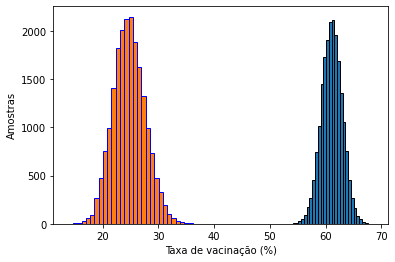

In [ ]:
plt.hist(values_high, bins=30, edgecolor='k')
plt.hist(values_low, bins=30, edgecolor='b')
plt.xlabel('Taxa de vacinação (%)')
plt.ylabel('Amostras')

# Gráfico obtido

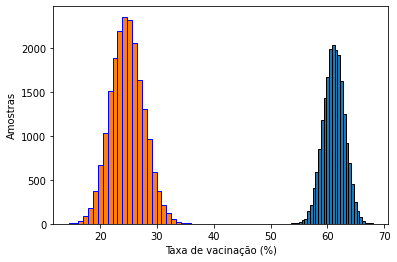

95% dos resultados dos países de IDH alto encontram-se no invervalo  $[57, 64]$ , enquanto 95% das amostras dos países de baixo IDH encontram-se no intervalo $[33,46]$ . Dessa forma a hipótese nula pode ser rejeitada e afirmamos que países com o IDH alto (maior ou igual a 0.7) tendem a ter uma maior taxa de vacinação comparados aos países de baixo IDH.

# **5. Intervalo de confiança: relação Ditaduras x Taxa de vacinação**

Para responder a **pergunta 3**, realizamos um teste de hipótese por *bootstrap* relacionando a conjuntura política de um país (se é uma ditadura ou uma democracia) com sua taxa de vacinação da COVID-19. Assim foi definida a hipótese nula $h_o$ e a hipótese alternativa $h_1$.

$h_0$: Países com regimes ditatoriais não tendem a ter uma taxa de vacinação mais baixa em comparação aos países de regimes democráticos.

$h_1$: Países com regimes ditatoriais tendem a ter uma taxa de vacinação mais baixa em comparação aos países de regimes democráticos.

# Código

Cruzando base de dados de vacinação e sobre regimes de governo:

In [ ]:
df_DEMOCRACY = df_DEMOCRACY[['Country_Name', 'Type']]
Vac_and_dem = df_VACCINATION.merge(df_DEMOCRACY, 
             how = "inner",
             left_on = "country", right_on = "Country_Name")
Vac_and_dem = Vac_and_dem[['country', 'people_fully_vaccinated_per_hundred', 'Country_Name', 'Type']]
Vac_and_dem.dropna()

,country,people_fully_vaccinated_per_hundred,Country_Name,Type
0,Afghanistan,11.10,Afghanistan,Dictatorship
1,Albania,42.30,Albania,Democracy
2,Algeria,13.70,Algeria,Dictatorship
3,Andorra,68.99,Andorra,Democracy
4,Angola,17.66,Angola,Dictatorship
...,...,...,...,...
174,Venezuela,49.77,Venezuela,Dictatorship
175,Vietnam,79.20,Vietnam,Dictatorship
176,Yemen,1.33,Yemen,Dictatorship
177,Zambia,11.54,Zambia,Dictatorship


Realizando Bootstrap para encontrar o intervalo de confiança:

In [ ]:
filtro = Vac_and_dem['Type'] == 'Dictatorship'
data_dem = Vac_and_dem[~filtro]['people_fully_vaccinated_per_hundred']
data_dic = Vac_and_dem[filtro]['people_fully_vaccinated_per_hundred']
N = 20000

size_dem = len(data_dem)
size_dic = len(data_dic)

values_dem = np.zeros(N)
values_dic = np.zeros(N)

for i in range(N):
    sample_dem = data_dem.sample(size_dem, replace=True)
    sample_dic = data_dic.sample(size_dic, replace=True)
    values_dem[i] = sample_dem.mean()
    values_dic[i] = sample_dic.mean()

Text(0, 0.5, 'Amostras')

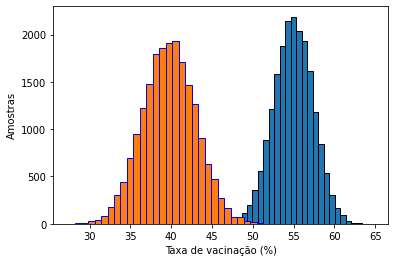

In [ ]:
plt.hist(values_dem, bins=30, edgecolor='k')
plt.hist(values_dic, bins=30, edgecolor='b')
plt.xlabel('Taxa de vacinação (%)')
plt.ylabel('Amostras')

# Gráfico obtido

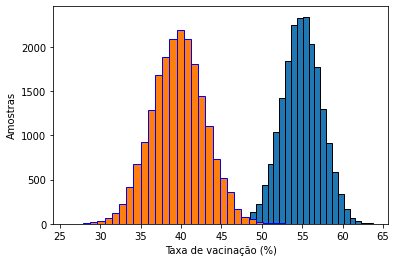

95% dos resultados dos países democráticos encontram-se no invervalo $[50, 59]$, enquanto 95% dos resultados dos países com regimes ditatoriais encontram-se no intervalo $[33, 46]$. Dessa forma a hipóte-se nula pode ser rejeitada e afirmamos que países com regimes ditatoriais tendem a ter uma taxa de vacinação mais baixa em comparação aos países de regimes democráticos. 

# **6. Regressões: IDH x Taxa de vacinação**
Para responder a **pergunta 4**, fizemos uma regressão linear relacionando a taxa de vacinação com o Índice de Desenvolvimento Humano dos países.

# Código

* Regressão linear simples

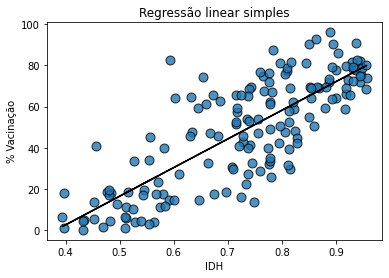

In [ ]:
### regressao linear Lucas


from sklearn.linear_model import LinearRegression

X = temp['2019'].values.reshape(-1, 1)   # put your dates in here
y = temp['people_fully_vaccinated_per_hundred'].values.reshape(-1, 1)   # put your kwh in here

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(X, model.predict(X),color='k')
plt.xlabel('IDH')
plt.ylabel('% Vacinação')
plt.title('Regressão linear simples')


yhat = model.predict(X)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
# adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

# Gráfico obtido

Obtivemos um modelo com o "R squared" igual a $0.64418057$. Sendo assim, nosso modelo explica aproximadamente $64\%$ da variância da taxa de vacinação em relação ao IDH.

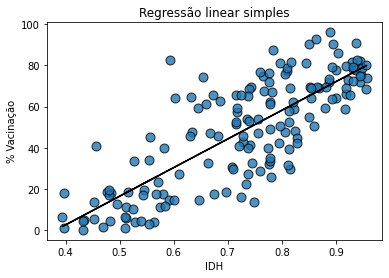

# **7. Regressão Linear: Coeficiente de GINI x Vacinação**


Para responder a **pergunta 5**, realizamos uma regressão linear para prever a taxa de vacinação dos países em relação ao seu Índice de Gini.

# Código

In [ ]:

temp2 = df_VACCINATION.merge(df_GINI, 
             how = "inner",
             left_on = "country", right_on = "country")
temp2 = temp2[['country', 'people_fully_vaccinated_per_hundred', '2019']]
temp2 = temp2.dropna()

array([0.03919605])

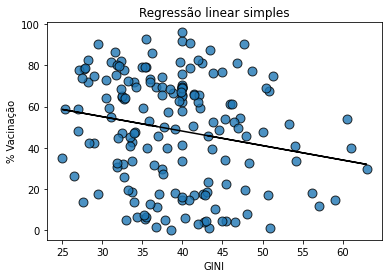

In [ ]:
X = temp2['2019'].values.reshape(-1, 1)   # put your dates in here
y = temp2['people_fully_vaccinated_per_hundred'].values.reshape(-1, 1)   # put your kwh in here
model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(X, model.predict(X),color='k')
plt.xlabel('GINI')
plt.ylabel('% Vacinação')
plt.title('Regressão linear simples')

yhat = model.predict(X)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
# adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

r_squared

# Gráfico obtido

Obtivemos um modelo com o "R squared" igual a $0.03919605$. Sendo assim, o nosso modelo de regressão linear explica apenas $3\%$ variância da taxa de vacinação em relação ao índice de Gini, portanto podemos afirmar que não existe uma forte relação linear entre estes dois atributos.

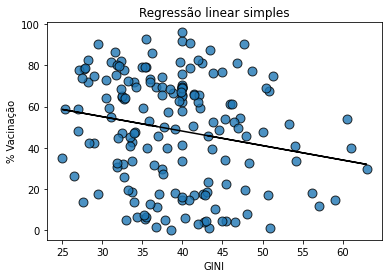

# **Conclusão**

Por fim, pôde-se concluir que a taxa de vacinação está relacionada com o índice de Desenvolvimento Humano de um país e com o seu regime de governo (se é democrático ou ditatorial). Além disso, não conseguimos implicar uma relação a partir do índice de GINI. Também verificamos a distribuição desigual da vacinação ao redor do mundo.